In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/Titanic_test.csv')
df = pd.read_csv('/content/Titanic_train.csv')


In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Age         177
Cabin       687
Embarked      2
dtype: int64


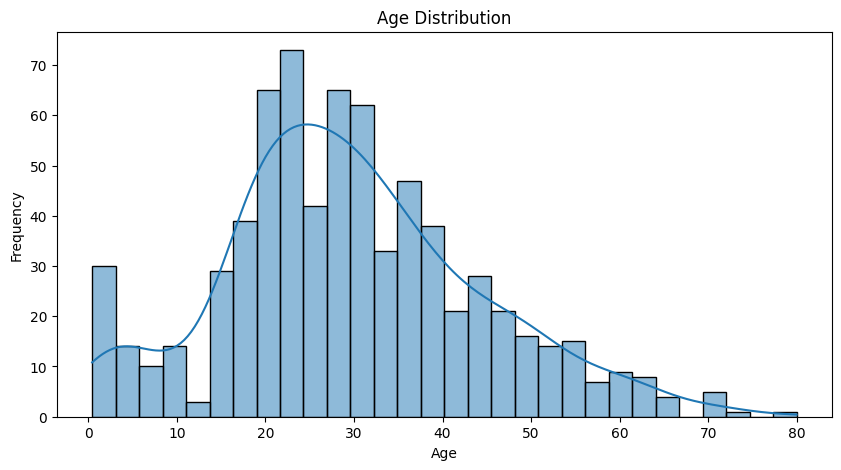

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Age
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


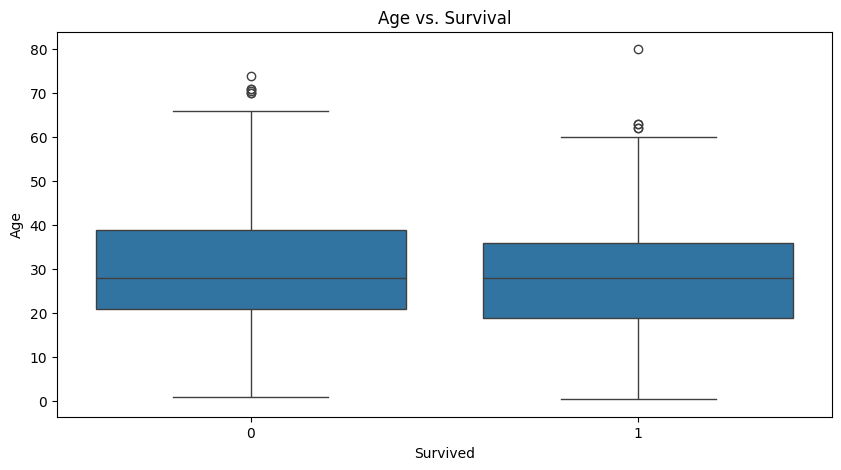

In [4]:
# Box plot of Age vs. Survival
plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs. Survival')
plt.show()

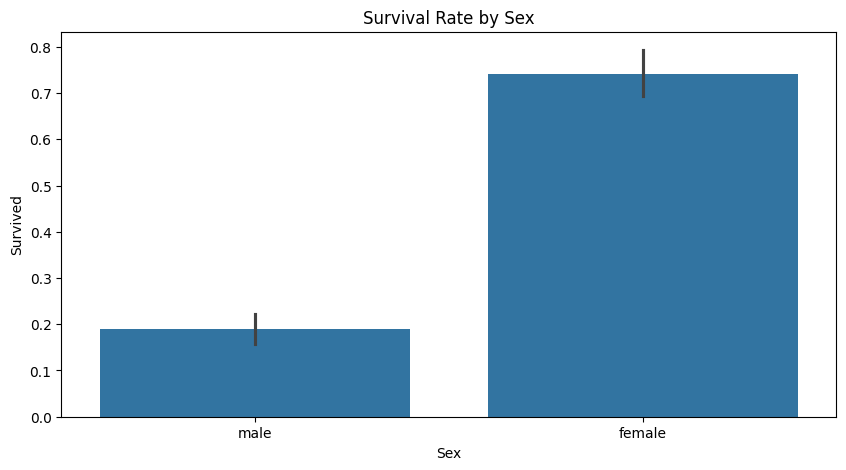

In [5]:
# Bar plot for Survival by Sex
plt.figure(figsize=(10, 5))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

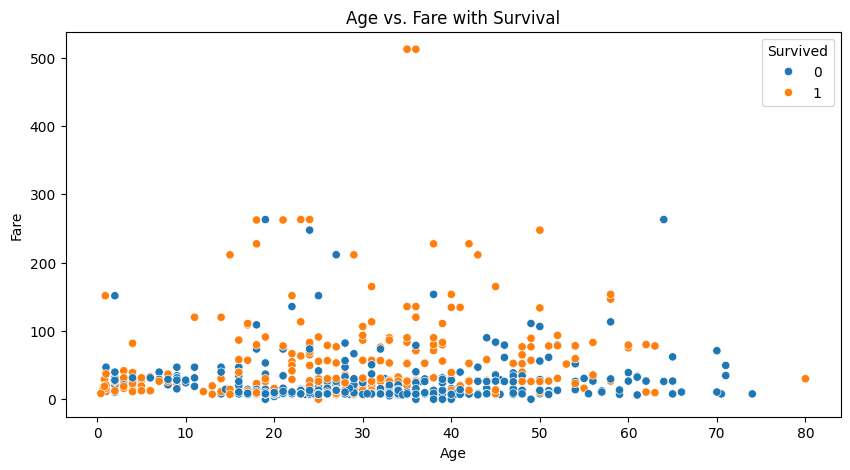

In [6]:
# Scatter plot for Age vs. Fare colored by Survival
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Age vs. Fare with Survival')
plt.show()

In [7]:
# Impute missing Age with median and Embarked with mode
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [8]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


In [10]:
 #Drop irrelevant columns
df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'], inplace=True)

In [11]:
X = df.drop('Survived', axis=1)
y = df['Survived']


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [14]:
import lightgbm as lgb
from xgboost import XGBClassifier

# LightGBM Model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:34:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [15]:
# Predictions
lgb_pred = lgb_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Calculate metrics
metrics = {
    'LightGBM': {
        'Accuracy': accuracy_score(y_test, lgb_pred),
        'Precision': precision_score(y_test, lgb_pred),
        'Recall': recall_score(y_test, lgb_pred),
        'F1 Score': f1_score(y_test, lgb_pred)
    },
    'XGBoost': {
        'Accuracy': accuracy_score(y_test, xgb_pred),
        'Precision': precision_score(y_test, xgb_pred),
        'Recall': recall_score(y_test, xgb_pred),
        'F1 Score': f1_score(y_test, xgb_pred)
    }
}
print(metrics)


{'LightGBM': {'Accuracy': 0.8268156424581006, 'Precision': 0.7945205479452054, 'Recall': 0.7837837837837838, 'F1 Score': 0.7891156462585034}, 'XGBoost': {'Accuracy': 0.8212290502793296, 'Precision': 0.8, 'Recall': 0.7567567567567568, 'F1 Score': 0.7777777777777778}}


In [16]:
from sklearn.model_selection import GridSearchCV

# Example for LightGBM hyperparameter tuning
param_grid = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [20, 40]
}

lgb_grid = GridSearchCV(lgb.LGBMClassifier(), param_grid, cv=3)
lgb_grid.fit(X_train, y_train)
print(f"Best params for LightGBM: {lgb_grid.best_params_}")


[LightGBM] [Info] Number of positive: 178, number of negative: 296
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 162
[LightGBM] [Info] Number of data points in the train set: 474, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375527 -> initscore=-0.508576
[LightGBM] [Info] Start training from score -0.508576
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


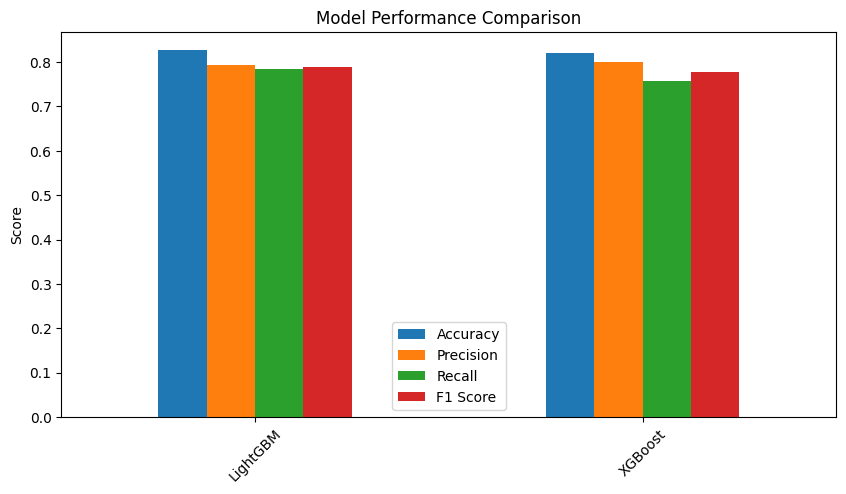

In [17]:
# Comparing results
metrics_df = pd.DataFrame(metrics).T
metrics_df.plot(kind='bar', figsize=(10, 5))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()
